# dIdV Analysis and Energy Resolution Measurement

**In the notebook, we demonstrate how to analyze beginning of run  didv data and calculate energy resolution by doing the following:**

  1. <font color="blue"><b>Analyze dIdV data:</b></font>
      * Process didv data (select good traces using autocuts, calculate offset/mean)
      * Fit dIdV data with both 2 and 3 poles
      * Calculate small signal parameters with true I0, R0 (re-calculated using results from IV sweep)<br><br>
  2. <font color="blue"><b>Calculate PSD </b></font>using random triggers selected from continuous data<br><br> 
  3. <font color="blue"><b>Create template</b></font>: functional form defined as the sum of 3 two-poles functions <br><br>
  4. <font color="blue"><b>Calculate dPdI</b></font> for the frequencies of the PSD<br><br>
  5. <font color="blue"><b>Calculate energy resolution</b></font>

In [2]:
import qetpy as qp
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import pickle

# detprocess
from detprocess import Noise, DIDVAnalysis, FilterData, Template

### Channels name and continuous data path, and dIdV <i>series</i> name


In [3]:
channels = ['Melange1pc1ch', 'Melange4pc1ch']

# Continuous data path and series with both channels
continuous_data_path = '/sdata1/runs/run28/raw/continuous_I2_D20230630_T193129'
continuous_data_series = 'I2_D20230630_T193742'
didv_borr_series = 'I2_D20230630_T193200'

## Analyze dIdV data

### Instantiate DIDVAnalysis and process data

In [4]:
# instantiate didvanalysis
didvanalysis = DIDVAnalysis()

# process raw data
# if already process use didvanalysis.set_processed_data(channel, didv_data=dictionary or pandas series)
didvanalysis.process_raw_data(channels, continuous_data_path, series=didv_borr_series)

INFO: Getting raw data and processing channel Melange1pc1ch
INFO: Getting raw data and processing channel Melange4pc1ch


### Set IV sweep results 

Let's get the result from the IV sweep (see  jupyter notebook "ivsweep_analysis_demo.ipynb"), adding some parameters (I0,R0,...) from the bias point as well for comparison

In [5]:
# load IV Sweep results (nboth Melange1pc1ch and Melange4pc1ch stored in same file)
ivsweep_file = '/sdata1/runs/run28/filterdata/iv_didv_I2_D20230615_T231959/ivsweep_analysis_D20240726_T140354.hdf5'
didvanalysis.set_ivsweep_results_from_file(channels, file_name=ivsweep_file, include_bias_parameters=True)

INFO: Loading filter data from file /sdata1/runs/run28/filterdata/iv_didv_I2_D20230615_T231959/ivsweep_analysis_D20240726_T140354.hdf5


In [6]:
# melange 1%
print('Melange 1% IV Results:\n')
ivresults_melange1pc1ch = didvanalysis.get_ivsweep_results('Melange1pc1ch')
pprint(ivresults_melange1pc1ch)


# melange 4%
print('\nMelange 4% IV Results:\n')
ivresults_melange4pc1ch = didvanalysis.get_ivsweep_results('Melange4pc1ch')
pprint(ivresults_melange4pc1ch)




Melange 1% IV Results:

{'close_loop_norm': 625000.0,
 'didv_2poles_L': 5.171749539630391e-07,
 'didv_2poles_L_err': 9.821950702071385e-09,
 'didv_2poles_beta': 0.19137709893806387,
 'didv_2poles_beta_err': 0.025566324857894215,
 'didv_2poles_chi2': 0.16970515655696497,
 'didv_2poles_gratio': -0.0,
 'didv_2poles_gratio_err': 0.0,
 'didv_2poles_l': 9.595717746228056,
 'didv_2poles_l_err': 0.8188733585633757,
 'didv_2poles_tau+': 3.920351953184047e-06,
 'didv_2poles_tau-': 0.00015626487933911558,
 'didv_2poles_tau0': 0.001300555428267739,
 'didv_2poles_tau0_err': 0.00012325258334847116,
 'didv_2poles_tau3': 0.0,
 'didv_3poles_L': 5.614255961355243e-07,
 'didv_3poles_L_err': 1.022539772687778e-08,
 'didv_3poles_beta': 0.14748932857403085,
 'didv_3poles_beta_err': 0.02478597055456562,
 'didv_3poles_chi2': 0.16442438458400865,
 'didv_3poles_gratio': 0.76352381012385,
 'didv_3poles_gratio_err': 0.02521337274954838,
 'didv_3poles_l': 2.7604828382489908,
 'didv_3poles_l_err': 0.177553393154418

### dIdV 2 and 3 poles fit


Melange1pc1ch dIdV 2-poles Fit Result:
Fit chi2/Ndof = 0.174

Fit time constants, NOT dIdV Poles: 
Tau1: 9.38e-05 s
Tau2: 4.45e-06 s
Tau3: 0 s
 

True dIdV Poles: 
Tau_plus: 4.85e-06 s
Tau_minus: 0.000128 s
Tau_third: 0 s

Melange1pc1ch dIdV 3-poles Fit Result:
Fit chi2/Ndof = 0.169

Fit time constants, NOT dIdV Poles: 
Tau1: 9.93e-05 s
Tau2: 5.19e-06 s
Tau3: 0.0002936 s
 

True dIdV Poles: 
Tau_plus: 5.84e-06 s
Tau_minus: 8.16e-05 s
Tau_third: 0.0003882 s

Melange1pc1ch dIdV Fit Plots:


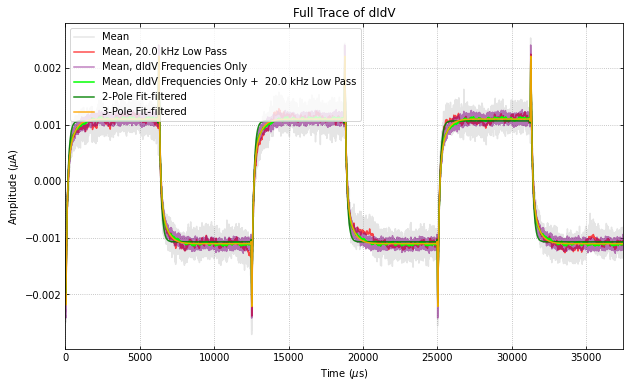

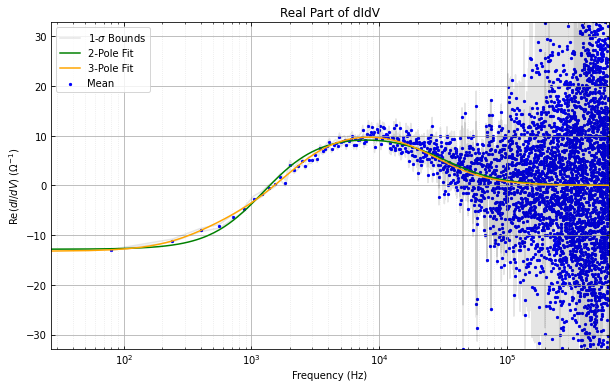

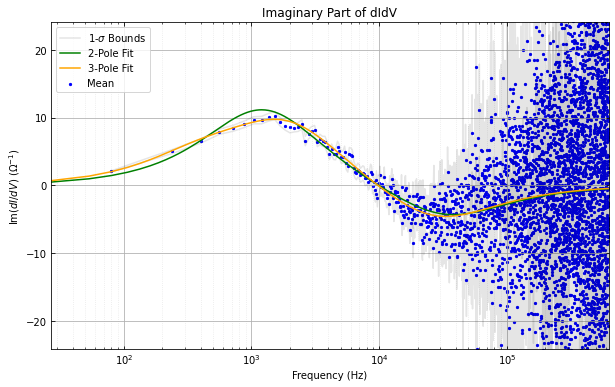


Melange4pc1ch dIdV 2-poles Fit Result:
Fit chi2/Ndof = 0.173

Fit time constants, NOT dIdV Poles: 
Tau1: 5.81e-05 s
Tau2: 3.42e-06 s
Tau3: 0 s
 

True dIdV Poles: 
Tau_plus: 3.79e-06 s
Tau_minus: 8.95e-05 s
Tau_third: 0 s

Melange4pc1ch dIdV 3-poles Fit Result:
Fit chi2/Ndof = 0.169

Fit time constants, NOT dIdV Poles: 
Tau1: 6.67e-05 s
Tau2: 4.17e-06 s
Tau3: 0.0001037 s
 

True dIdV Poles: 
Tau_plus: 4.87e-06 s
Tau_minus: 4.41e-05 s
Tau_third: 0.0001634 s

Melange4pc1ch dIdV Fit Plots:


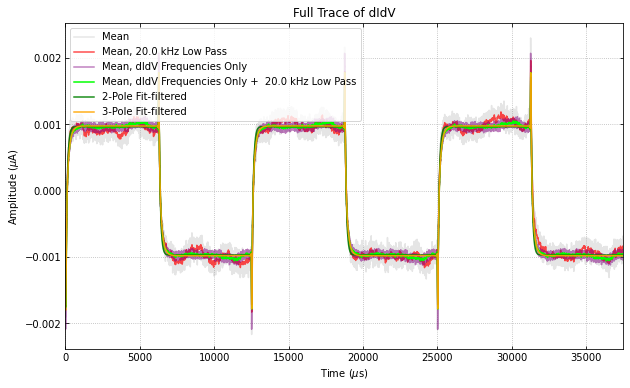

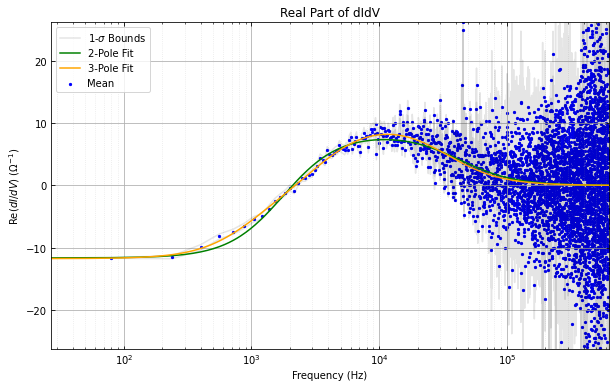

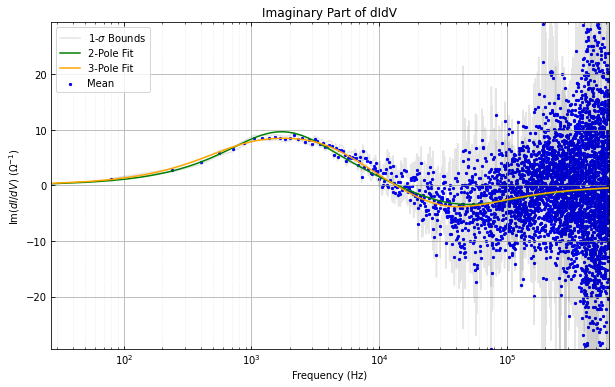

In [7]:
didvanalysis.dofit([2,3], lgc_plot=True )

### Calculate small signal parameters, using  I0 and  R0 from IV sweep

In [8]:
didvanalysis.calc_smallsignal_params()

INFO: Calculating small signal parameters uncertainties for channel Melange1pc1ch
INFO: Calculating small signal parameters for 2-poles model 
INFO: Calculating small signal parameters for 3-poles model 
INFO: Calculating small signal parameters uncertainties for channel Melange4pc1ch
INFO: Calculating small signal parameters for 2-poles model 
INFO: Calculating small signal parameters for 3-poles model 


### Let's compare <i>true</i> bias parameters I0, R0, P0  with parameters from IV sweep  


**FIXME**: No comparison yet NO TRUE CURRENT CALCULATION

We will compare the calculate bias parameters with IV Sweep. Also we can calculated bias parameters using  dIdV fit only with infinite loop gain approximation (independent of offsert)




In [9]:
# let's first calculate bias parameters with infinite loop gain calculation
didvanalysis.calc_bias_params_infinite_loop_gain(channels)

INFO: Calculating bias parameters with infinite loop gain approximation for channel Melange1pc1ch
INFO: Calculating bias parameters with infinite loop gain approximation for channel Melange4pc1ch


#### Melange 1%

In [10]:
df = didvanalysis.compare_with_ivsweep('Melange1pc1ch')
df

,dIdV,IV Sweep
R0 [mOhms],109 +/- 2.258,109 +/- 2.258
I0 [muAmps],0.55 +/- 9.736e-05,0.55 +/- 9.736e-05
P0 [fWatts],33 +/- 0.6834,33 +/- 0.6834


As we can see above the <b>bias power seems to have drastically increase</b> since IV sweep. However, the dIdV data has been taken with different output variable offset, which can be modified from readout electronics. <b>The variable offset is not very linear and thus there is a large error.</b><br>

We will calculate later the energy resolution using both "true" current and current using infinite loop gain approximation.

#### Melange 4%

In [11]:
df = didvanalysis.compare_with_ivsweep('Melange4pc1ch')
df

,dIdV,IV Sweep
R0 [mOhms],81.2 +/- 1.682,81.2 +/- 1.682
I0 [muAmps],1.68 +/- 3.139e-05,1.68 +/- 3.139e-05
P0 [fWatts],230 +/- 4.769,230 +/- 4.769


The above table shows that the "true" power has decreased for Malange 4% however again due to non-linearities with variable offset, the result may not be very reliable. In fact,  the bias power using <b> infinite loop gain approximation </b> hasn't changed.


## Energy Resolution  

Let's calculate energy resolution using 20ms traces for both "true" current and  current with "infinite loop gain approximation"

  1. <b>Calculate PSD (two-sided)</b> using traces randomly selected in continuous data
  2. <b>Calculate Template</b> (same template as for IV sweep)
  3. <b>Calculate dPdI over the frequencies from PSD</b>
  4. <b>Calculate energy resolution</b>

### Noise PSD

#### Select randoms

In [12]:
noise = Noise(verbose=True)
noise.generate_randoms(continuous_data_path, series=continuous_data_series, 
                       nevents=1000, min_separation_msec=100, ncores=1)


INFO: Found total of 4 raw data file(s) from 1 different series number!
INFO: Found total of 4 files from 1 different series number!
INFO Node #1: Acquiring randoms for series I2_D20230630_T193742
INFO: Randoms acquisition done!


#### Calculate two-sides PSD for both channels

INFO: Processing PSD for channel Melange1pc1ch
INFO: 840 events found in raw data for channel(s) Melange1pc1ch
INFO: Number of events after cuts = 206, efficiency = 24.52%
INFO: Processing PSD for channel Melange4pc1ch
INFO: 840 events found in raw data for channel(s) Melange4pc1ch
INFO: Number of events after cuts = 399, efficiency = 47.50%


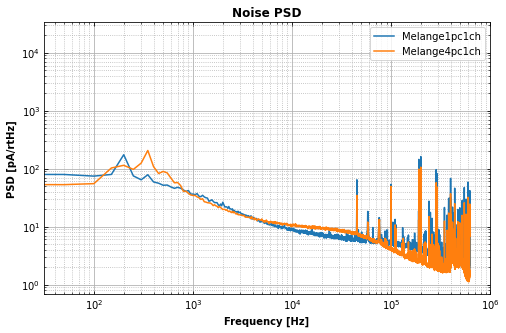

In [14]:
# 20 ms trace length
trace_length_msec = 20
pretrigger_length_msec = 10


# calculate PSD
noise.calc_psd(channels,
               nevents=1000,
               trace_length_msec=trace_length_msec, 
               pretrigger_length_msec=pretrigger_length_msec)

# get values
psd_melange1pc1ch, psd_freq = noise.get_psd('Melange1pc1ch')
psd_melange4pc1ch, psd_freq = noise.get_psd('Melange4pc1ch')
fs = noise.get_sample_rate()

# display
noise.plot_psd(channels)


### Functional Form Template  (sum of three 2-poles function)

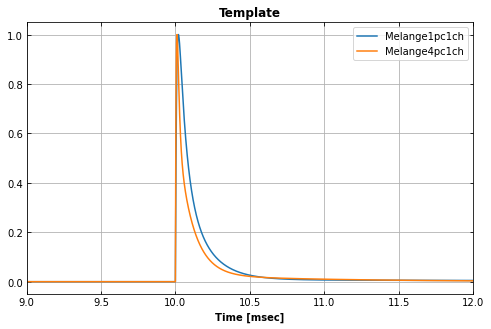

In [15]:
# instantiate template object
template = Template()

# Template Melange 1%1
amplitudes = [1.67e-15, 1.32e-15, 2.39e-17]
fall_times = [44.6e-6, 147.5e-6, 3872.9e-6]
rise_times = [8.79e-6, 8.79e-6, 8.79e-6]

template.create_template_sum_twopoles('Melange1pc1ch', 
                                      amplitudes, rise_times, fall_times,
                                      sample_rate=fs,
                                      trace_length_msec=trace_length_msec,
                                      pretrigger_length_msec=pretrigger_length_msec) 



# Template Melange 4%
amplitudes = [2.8e-15, 2.54e-15, 1.43e-16]
fall_times = [10.0e-6, 99.4e-6, 930.6e-6]
rise_times = [7.00e-6, 7.00e-6, 7.00e-6]

template.create_template_sum_twopoles('Melange4pc1ch', 
                                      amplitudes, rise_times, fall_times,
                                      sample_rate=fs,
                                      trace_length_msec=trace_length_msec,
                                      pretrigger_length_msec=pretrigger_length_msec) 



# get templates array
template_melange1pc1ch, time_array = template.get_template('Melange1pc1ch')
template_melange4pc1ch, time_array = template.get_template('Melange4pc1ch')


# display
template.plot_template(['Melange1pc1ch', 'Melange4pc1ch'], xmin=9, xmax=12)


### dPdI and energy resolution calculation

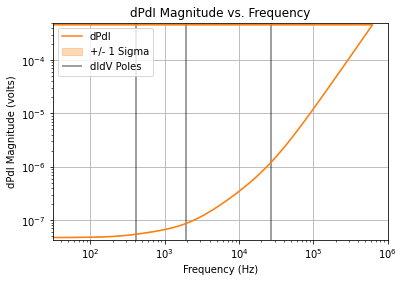

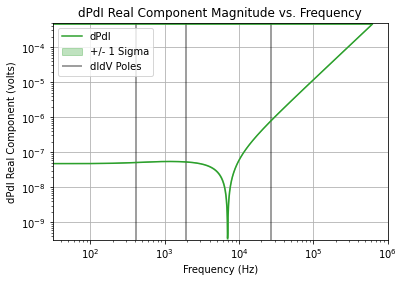

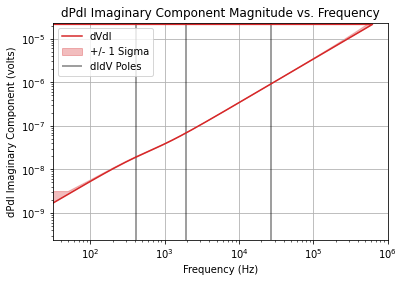

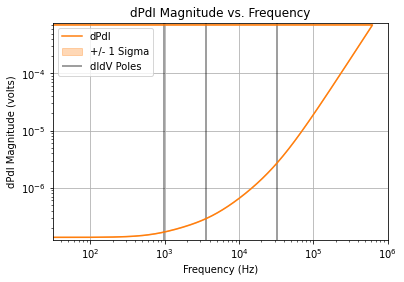

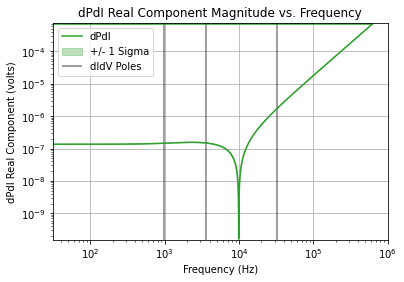

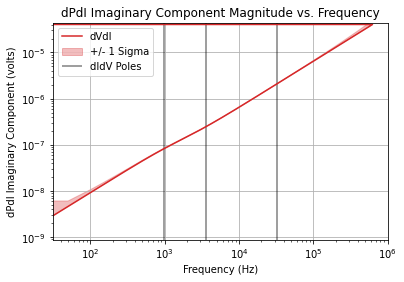

In [16]:
# dPdI
didvanalysis.calc_dpdi(psd_freq, list_of_poles=[3], lgc_plot=True)

In [17]:
# let's use same collection efficiency as for the IV sweep
melange1pc1ch_collection_eff = ivresults_melange1pc1ch['resolution_collection_efficiency']
melange4pc1ch_collection_eff = ivresults_melange4pc1ch['resolution_collection_efficiency']

print('Melange 1% collection efficiency = {:.3f}'.format(melange1pc1ch_collection_eff))
print('Melange 4% collection efficiency = {:.3f}'.format(melange4pc1ch_collection_eff))

Melange 1% collection efficiency = 0.420
Melange 4% collection efficiency = 0.520


In [18]:
resolution_melange1pc1ch = didvanalysis.calc_energy_resolution('Melange1pc1ch', 
                                                               psd_melange1pc1ch, 
                                                               fs=fs, 
                                                               template=template_melange1pc1ch, 
                                                               collection_eff=melange1pc1ch_collection_eff, 
                                                               lgc_power_template=True)

resolution_melange4pc1ch = didvanalysis.calc_energy_resolution('Melange4pc1ch', 
                                                               psd_melange4pc1ch, 
                                                               fs=fs, 
                                                               template=template_melange4pc1ch, 
                                                               collection_eff=melange4pc1ch_collection_eff, 
                                                               lgc_power_template=True)


# display
print('Melange 1% energy resolution = {:.3g} meV'.format(resolution_melange1pc1ch*1000))
print('Melange 4% energy resolution = {:.3g} meV'.format(resolution_melange4pc1ch*1000))

Melange 1% energy resolution = 482 meV
Melange 4% energy resolution = 828 meV


### Energy Resolution Summary 

In [19]:
# Melange 1%
data = dict()
data['Collection efficiency'] = [
    '{:2g}'.format(melange1pc1ch_collection_eff),
    '{:2g}'.format(melange1pc1ch_collection_eff)]


data['Resolution [meV]'] = [
    '{:3g}'.format(1000*ivresults_melange1pc1ch['resolution_template']),
    '{:3g}'.format(1000*resolution_melange1pc1ch)]


df_melange1pc1ch = pd.DataFrame.from_dict(data, orient='index', columns=['IV Sweep', 'BOR dIdV'])

# Melange 4%
data = dict()
data['Collection efficiency'] = [
    '{:2g}'.format(melange4pc1ch_collection_eff),
    '{:2g}'.format(melange4pc1ch_collection_eff)]


data['Resolution  [meV]'] = [
    '{:3g}'.format(1000*ivresults_melange4pc1ch['resolution_template']),
    '{:3g}'.format(1000*resolution_melange4pc1ch)]


   
df_melange4pc1ch = pd.DataFrame.from_dict(data, orient='index', columns=['IV Sweep', 'BOR dIdV'])
                                                       

In [20]:
df_melange1pc1ch

,IV Sweep,BOR dIdV
Collection efficiency,0.42,0.42
Resolution [meV],867.864,482.165


In [21]:
df_melange4pc1ch

,IV Sweep,BOR dIdV
Collection efficiency,0.52,0.52
Resolution [meV],891.58,828.435
